In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path
path = r"C:\Users\Emily\01-2026 Instacart Basket Analysis"

In [7]:
# Import dataset
df_ords_prods_merged_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

<Axes: xlabel='orders_day_of_week'>

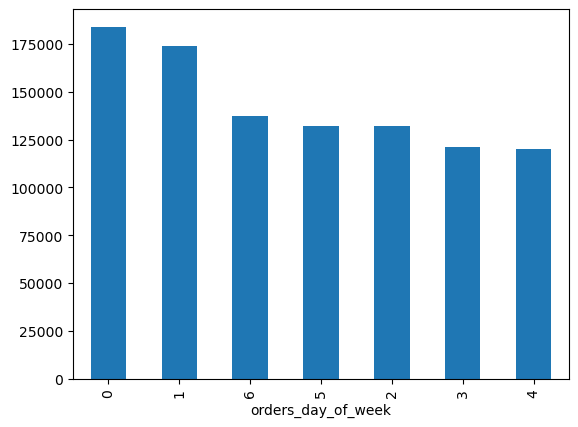

In [8]:
# Creating s br chart
df_ords_prods_merged_grouped['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

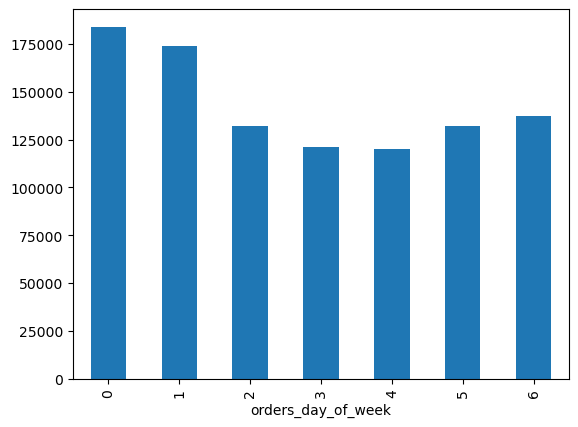

In [9]:
# Sorting the bars in your chart according to their index
df_ords_prods_merged_grouped['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Printing the frequencies
df_ords_prods_merged_grouped['orders_day_of_week'].value_counts()

orders_day_of_week
0    183956
1    174070
6    137125
5    132019
2    132015
3    120883
4    119932
Name: count, dtype: int64

In [11]:
df_ords_prods_merged_grouped['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    183956
1    174070
2    132015
3    120883
4    119932
5    132019
6    137125
Name: count, dtype: int64

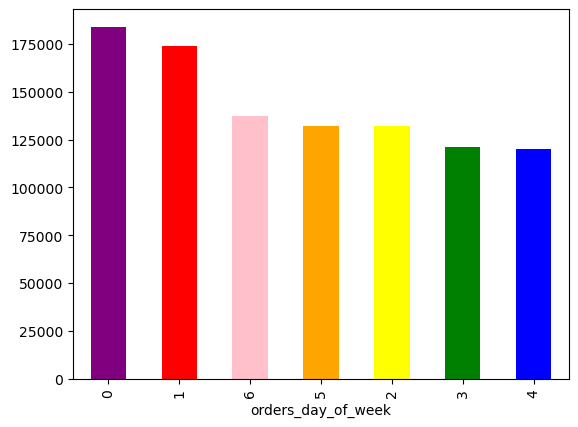

In [14]:
# Changing bar colors
bar = df_ords_prods_merged_grouped['orders_day_of_week'].value_counts().plot.bar(color =[ 'purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

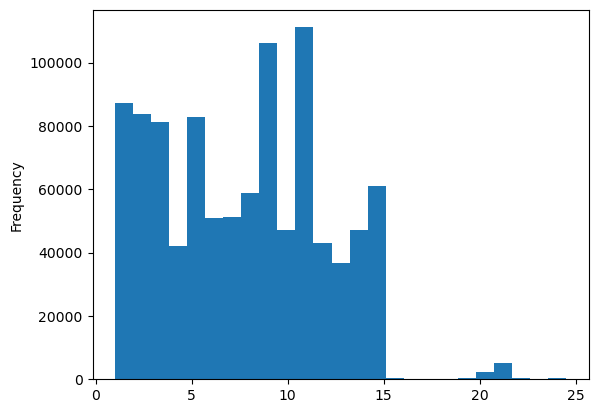

In [16]:
# Creating a Histogram
df_ords_prods_merged_grouped['prices'].plot.hist(bins = 25)

In [18]:
# Data consistency checks
df_ords_prods_merged_grouped['prices'].describe()

count    1000000.000000
mean           7.738643
std            4.224603
min            1.000000
25%            3.800000
50%            8.000000
75%           11.300000
max           24.500000
Name: prices, dtype: float64

In [19]:
df_ords_prods_merged_grouped['prices'].mean()

np.float64(7.738643)

In [20]:
df_ords_prods_merged_grouped['prices'].median()

8.0

In [21]:
df_ords_prods_merged_grouped['prices'].max()

24.5

<Axes: xlabel='prices', ylabel='prices'>

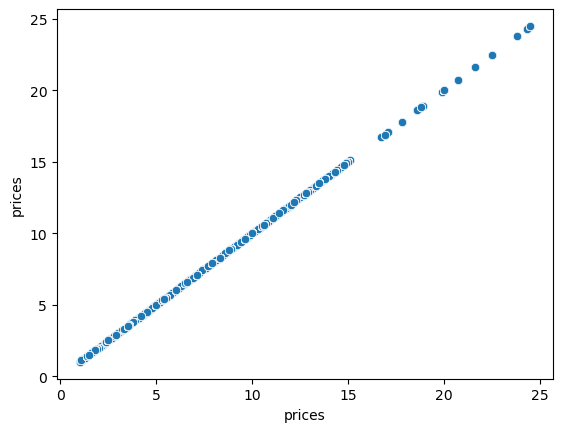

In [22]:
# Creating a Scatter Plot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged_grouped)

In [29]:
# Running a check
df_ords_prods_merged_grouped.loc[df_ords_prods_merged_grouped['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag


In [34]:
# Assigning missing values
df_ords_prods_merged_grouped.loc[df_ords_prods_merged_grouped['prices'] >100, 'prices'] = np.nan

In [35]:
df_ords_prods_merged_grouped['prices'].max()

24.5

<Axes: ylabel='Frequency'>

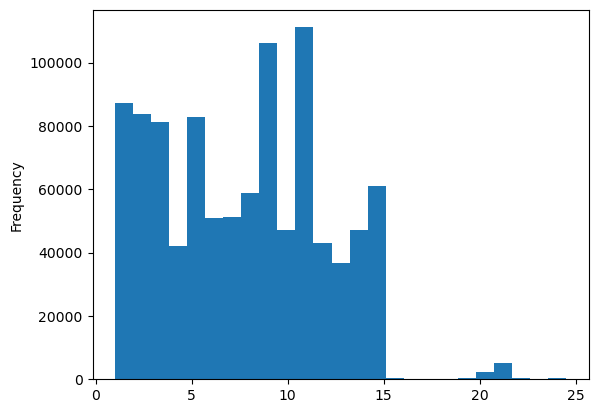

In [36]:
# running histogrm chart again
df_ords_prods_merged_grouped['prices'].plot.hist(bins = 25)

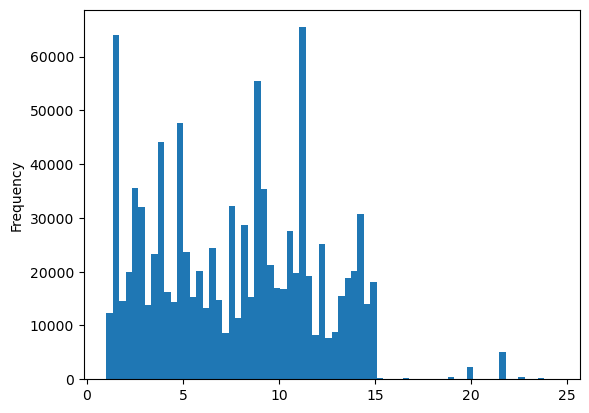

In [49]:
# Increasing numberof bins to 70
hist_2 = df_ords_prods_merged_grouped['prices'].plot.hist(bins = 70)

In [48]:
# Defining histogranm chart
hist = df_ords_prods_merged_grouped['prices'].value_counts()

In [51]:
# Exporting the histogram chart
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [52]:
# Sampling
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged_grouped)) <= 0.7

In [54]:
# Creating new list
dev

array([False,  True, False, ..., False,  True, False], shape=(1000000,))

In [56]:
# Producing 10 random numbers
np.random.rand(10)

array([0.30956713, 0.87468615, 0.50287514, 0.38487566, 0.60254022,
       0.32412759, 0.65601576, 0.62784649, 0.42485982, 0.46653877])

In [57]:
# Splitting dataframe into two samples
big = df_ords_prods_merged_grouped[dev]
small = df_ords_prods_merged_grouped[~dev]

In [59]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_ords_prods_merged_grouped)) <= 0.7

In [62]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged_grouped[dev]

In [63]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged_grouped[~dev]

In [66]:
#Checking output
len(df_ords_prods_merged_grouped)

1000000

In [67]:
len(big) + len(small)

1000000

In [68]:
# Reducing samples to only those columns necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

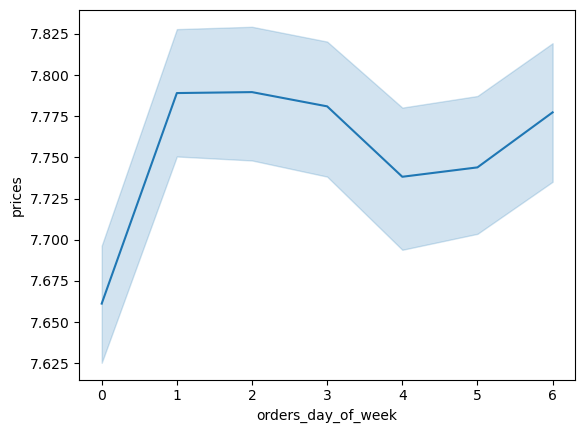

In [69]:
# Creating a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')